## 1.导入NMIST数据集

In [1]:
import tensorflow as tf
import pylab
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/")

print('输入数据:', mnist.train.images)
print('输入数据打shape:', mnist.train.images.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据打shape: (55000, 784)


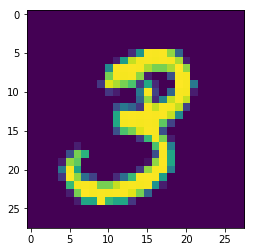

输入数据打shape: (10000, 784)
输入数据打shape: (5000, 784)


In [3]:
im = mnist.train.images[1]
im = im.reshape(-1, 28)
pylab.imshow(im)
pylab.show()

print('输入数据打shape:', mnist.test.images.shape)
print('输入数据打shape:', mnist.validation.images.shape)

## 2.分析MNIST样本特点定义变量

In [4]:
tf.reset_default_graph()
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784])  # mnist data维度 28*28=784
y = tf.placeholder(tf.int32, [None]) # 0-9 数字=> 10 classes

## 3.构建模型

In [5]:
# Set model weights
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))

z = tf.matmul(x, W) + b
# 构建模型
pred = tf.nn.softmax(z)  # Softmax分类

In [6]:
# 损失函数：交叉熵
# cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=z))
# 学习率
learning_rate = 0.01
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## 4.训练模型并输出中间状态参数

In [7]:
training_epochs = 25
batch_size = 100
display_step = 1

In [8]:
# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # Initializing OP

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # 运行优化器
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # 计算平均loss值
            avg_cost += c / total_batch
        
        # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(avg_cost))
    print(" Finished!")

Epoch: 0001 cost= 8.614308563
Epoch: 0002 cost= 4.856622005
Epoch: 0003 cost= 3.363239479
Epoch: 0004 cost= 2.617300413
Epoch: 0005 cost= 2.185363185
Epoch: 0006 cost= 1.908526478
Epoch: 0007 cost= 1.717165033
Epoch: 0008 cost= 1.577148756
Epoch: 0009 cost= 1.469890600
Epoch: 0010 cost= 1.384755983
Epoch: 0011 cost= 1.315332367
Epoch: 0012 cost= 1.257089480
Epoch: 0013 cost= 1.207576850
Epoch: 0014 cost= 1.164839908
Epoch: 0015 cost= 1.127138443
Epoch: 0016 cost= 1.093884765
Epoch: 0017 cost= 1.063963067
Epoch: 0018 cost= 1.037002648
Epoch: 0019 cost= 1.012424106
Epoch: 0020 cost= 0.989994706
Epoch: 0021 cost= 0.969220362
Epoch: 0022 cost= 0.950107772
Epoch: 0023 cost= 0.932247430
Epoch: 0024 cost= 0.915756214
Epoch: 0025 cost= 0.900180746
 Finished!
